# Problem 6.6

**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual - Chapter 6**

**Problem 6.6**


**A research group with capabilities of III-V materials manufacturing wants to make a two-terminal tandem cell using an optimized composition with a bandgap of 0.9 eV for the bottom subcell. For the top subcell, they can grow compounds with bandgaps in the range 1.4 to 1.9 eV. Which bandgap should they use to achieve the maximum efficiency under the AM1.5G spectrum? Assume $P_{max} \approx 0.85 · J · V_{max}$ as a rough estimation for the maximum power produced by each subcell. Here, the factor 0.85 approximates the fill factor of each subcell. $J$ is the subcell’s photocurrent density and $V_{max} \approx 0.75 · E_g$ (in volts) is an approximated value of the open-circuit voltage.**

We will use the package [pandas](https://pandas.pydata.org/) to handle the data and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We start by importing the data

In [2]:
datafile = pd.read_csv('data/Reference_spectrum_ASTM-G173-03.csv', index_col=0, header=0) 
datafile

,AM0,AM1.5G,AM1.5D
Wvlgth nm,Etr W*m-2*nm-1,Global tilt W*m-2*nm-1,Direct+circumsolar W*m-2*nm-1
280,8.20E-02,4.73E-23,2.54E-26
280.5,9.90E-02,1.23E-21,1.09E-24
281,1.50E-01,5.69E-21,6.13E-24
281.5,2.12E-01,1.57E-19,2.75E-22
...,...,...,...
3980,8.84E-03,7.39E-03,7.40E-03
3985,8.80E-03,7.43E-03,7.45E-03
3990,8.78E-03,7.37E-03,7.39E-03
3995,8.70E-03,7.21E-03,7.23E-03


In [3]:
datafile.drop(datafile.index[0], inplace=True) #remove row including information on units
datafile=datafile.astype(float) #convert values to float for easy operation
datafile.index=datafile.index.astype(float) #convert indexes to float for easy operation

We select the AM1.5G spectrum for our calculations

In [4]:
G = datafile['AM1.5G']
G

280.0     4.730000e-23
280.5     1.230000e-21
281.0     5.690000e-21
281.5     1.570000e-19
282.0     1.190000e-18
              ...     
3980.0    7.390000e-03
3985.0    7.430000e-03
3990.0    7.370000e-03
3995.0    7.210000e-03
4000.0    7.100000e-03
Name: AM1.5G, Length: 2002, dtype: float64

<br>
First we define a function that calculates the power density produced by a subcell

In [5]:
def power_subcell(J,Eg): #J in A/m2, Eg in eV
    return 0.85*J*0.75*Eg #W/m2

<br>
We define a function to calculate the maximum photocurrent that a subcell can deliver under the AM1.5G spectrum.
The top cell will absorb all photons with more energy than its bandgap, whereas the bottom cell
will only absorb photons more energetic than its bandgap but less energetic than the bandgap of the top cell.

We define the adequate constants to calcutale the ideal SR and, with it, we calculate the maximum current density $J_{max}$ using Eq. 3.5

$J_{max}=\int SR_{ideal}(\lambda) \cdot G(\lambda) \ d\lambda$ (A/m2)

In [6]:
h=6.63*10**(-34) # [J·s] Planck constant
e=1.60*10**(-19) #[C] electron charge
c =299792458 #[m/s] Light speed

idealSR=pd.Series(index=G.index,
                  data=[wl*0.000000001*e/(h*c) for wl in G.index])

def max_photocurrent(wl): #wl in nm
    return np.trapz(G[G.index<wl]*idealSR[idealSR.index<wl], x = G.index[G.index < wl]) #A/m2

The power density produced by the two-terminal tandem is the sum of that of the two subcells.
Since the subcells are series connectesd, the current density used in the calculation of the power density is the same for both subcells, and is the one of the subcell that generates less current.

In [7]:
def power_tandem(Eg_top, Eg_bot):
    J_top_max=max_photocurrent(1240/Eg_top) #the bandgap is expressed in nm in the 'photocurrent' function
    J_bot_max=max_photocurrent(1240/Eg_bot)-J_top_max #the bandgap is expressed in nm in the 'photocurrent' function
    J_tandem=np.min([J_bot_max, J_top_max])
    
    return power_subcell(J_tandem, Eg_top) + power_subcell(J_tandem, Eg_bot)

We define an array with the bandgap values to explore

In [8]:
gaps=np.linspace(1.4, 1.9, 50) #100 values

We construct an tandem-efficiency array using the 'power_tandem' function. The bandgap of the bottom cell is 0.9 eV.

In [9]:
P_in=1000 #W/m2, power density of the AM1.5G spectrum
tandem_effs = np.zeros(gaps.size)
for i, gap in enumerate(gaps):
    tandem_effs[i]=power_tandem(gap, 0.9)/P_in

We plot the obtained efficiency as a function of the top-cell bandgap

Text(0.5, 0, 'Top-subcell bandgap, $E_g$ (eV)')

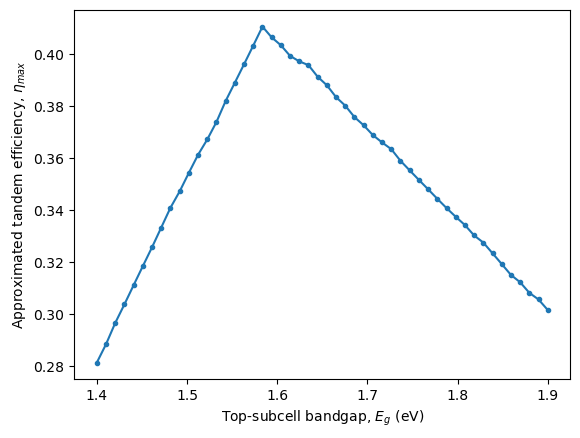

In [10]:
plt.plot (gaps, tandem_effs, '.-')
plt.ylabel(r'Approximated tandem efficiency, $\eta_{max}$')
plt.xlabel(r'Top-subcell bandgap, $E_g$ (eV)')

The approximated tandem efficiency is maximum for a top-subcell bandgap of around 1.6 eV.